In [2]:
from anyBSM import anyBSM
import numpy as np
from math import sqrt
import logging
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size'] = 19

In [3]:
# init models
GM = anyBSM(anyBSM.built_in_models['GeorgiMachacek'], scheme_name = "OS", progress = False, caching = 2, quiet=True)
GMA = anyBSM(anyBSM.built_in_models['GeorgiMachacekAligned'], scheme_name = "OS", progress = False, caching = 2, quiet=True)

In [107]:
Mh2 = 350
Meta = 350
M5 = 400
M2 = 400
Lam3 = -0.1
Lam4 = 0.2

In [108]:
GMA.setparameters({'Mh2': Mh2, 'Meta': Meta, 'M5': M5,'M2': M2, 'Lam3': Lam3, 'Lam4': Lam4})

In [109]:
M3=GMA.all_particles['Ah2'].nmass

In [110]:
GM.setparameters({'M3': M3, 'Meta': Meta, 'M5': M5,'M2': M2, 'Lam3': Lam3, 'Lam4': Lam4,'SinH': 0})

In [111]:
[GMA.all_particles[f].nmass-GM.all_particles[f].nmass for f in ['Ah2','h2','h3','Hp2','Hp3','Hmm']]

In [112]:
lamGMA=GMA.lambdahhh()['total'].real
lamGMA

Text(0, 0.5, '$\\kappa_\\lambda$')

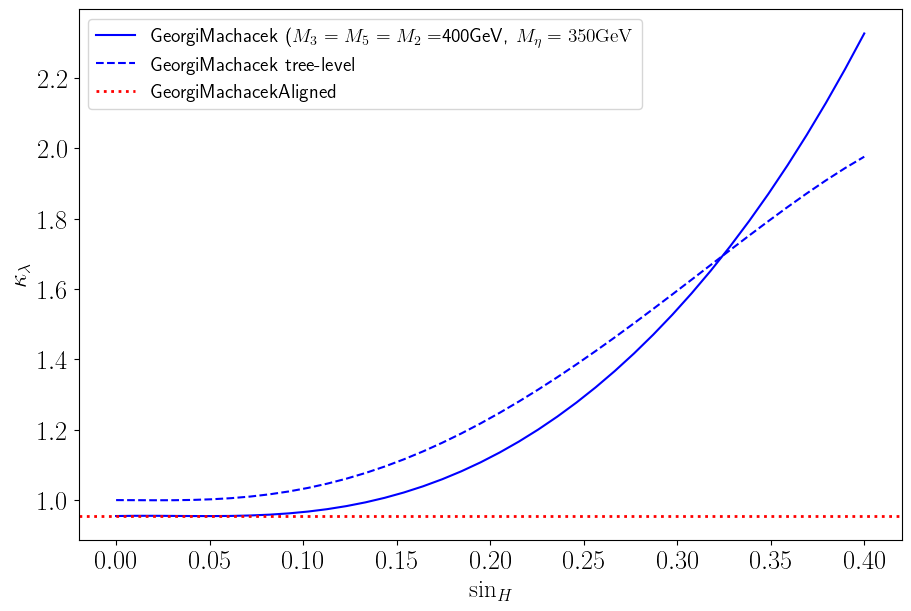

In [114]:
def lambdahhhSH(SinH):
    GM.setparameters(params={'Qren': (M3+173)/2,'M3': M3, 'Meta': Meta, 'M5': M5,'M2': M2, 'Lam3': Lam3, 'Lam4': Lam4, 'SinH': SinH})
    return (GM.lambdahhh()['total'].real/187.2818,GM.lambdahhh()['treelevel'].real/187.2818)

SinHvals= np.linspace(start=0,stop=0.4, num=40)

GM.load_renormalization_scheme('OS')
lamvals = np.array(list(map(lambdahhhSH,SinHvals)))

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(9,6))
plt.plot(SinHvals,lamvals.transpose()[0],c='blue',label='GeorgiMachacek ($M_3=M_5=M_2=$400GeV, $M_\\eta=350\mathrm{ GeV}$')
plt.plot(SinHvals,lamvals.transpose()[1],ls='--',c='blue',label='GeorgiMachacek tree-level')

ax.axhline(y=lamGMA/187.2818,color='red',lw=2,ls=':',label=r'GeorgiMachacekAligned')
ax.legend(loc='upper left',fontsize=14)
ax.set_xlabel(r'$\sin_H$',fontsize=18)
ax.set_ylabel(r'$\kappa_\lambda$',fontsize=18)